In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv("customer_shopping_data.csv")



In [4]:
df1 = df0.copy()

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
# convertir el
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], dayfirst=True )

In [7]:
df1['invoice_date'].head(2)

0   2022-08-05
1   2021-12-12
Name: invoice_date, dtype: datetime64[ns]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [9]:
# agregar columnas para anuales
df1['year'] = df1['invoice_date'].dt.strftime('%Y')

In [10]:
df1['month'] = df1['invoice_date'].dt.month

In [11]:
df1['month'].head()

0     8
1    12
2    11
3     5
4    10
Name: month, dtype: int32

In [12]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


# relacion de genero y numero de transacciones

[Text(0.5, 1.0, 'relacion de genero y numero de transacciones')]

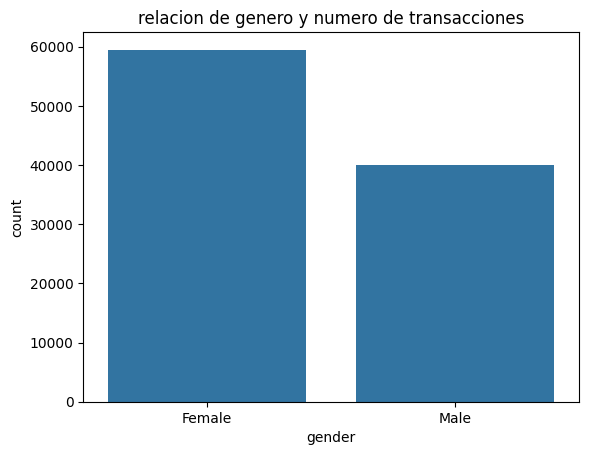

In [13]:
sns.countplot(data=df1, x='gender').set(title='relacion de genero y numero de transacciones')

In [14]:
# cantitad de elementos por categoria
gender_quantity = df1['gender'].value_counts()
print(gender_quantity)

gender
Female    59482
Male      39975
Name: count, dtype: int64


Text(0.5, 1.0, 'relacion de transacciones entre hombres y mujeres')

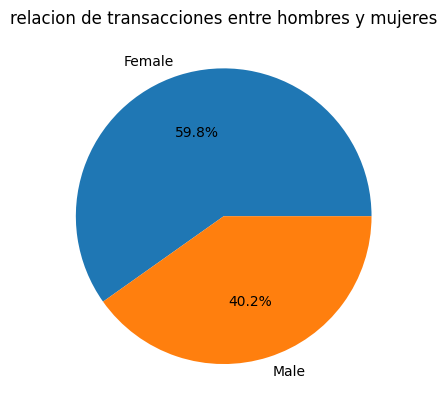

In [15]:
# histograma
plt.pie(gender_quantity, labels=gender_quantity.index, autopct='%1.1f%%')
plt.title('relacion de transacciones entre hombres y mujeres')

# Distribucion de edades por numero de transacciones

In [16]:
df2 = df1.copy()

In [17]:
df2.describe()

,age,quantity,price,invoice_date,month
count,99457.000000,99457.000000,99457.000000,99457,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,6.113898
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,3.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,6.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,9.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,12.000000
std,14.990054,1.413025,941.184567,NaN,3.569511


In [19]:
# creo nueva colummna para categoria edad
df2['age_cat'] = df2['age']

In [20]:
# defino categoria edades
# funciones para definir categoria de edad
# gen z: 18-24, milllenials 25-34, gen x 35-49, gen boomers 50-64, gen s 65 en adelante

def categoryf(age):
    if (age >= 18) and (age < 25):
        return '18-24'
    elif (age >= 25) and (age < 35):
        return '25-34'
    elif (age >= 35) and (age < 50):
        return '35-49'
    elif (age >= 50) and (age < 65):
        return '50-64'
    else:
        return '65...'

In [22]:
# aplicamos nuestra funcion
df2['age_cat'] = df2['age_cat'].apply(categoryf)

In [23]:
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,50-64


[Text(0.5, 1.0, 'Edades por transaccion')]

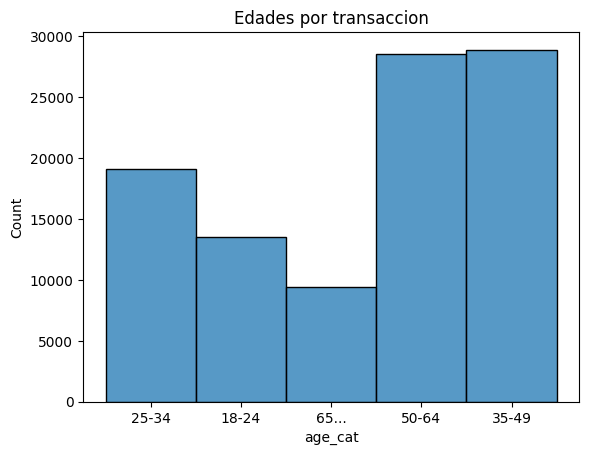

In [26]:
sns.histplot(data=df2, x='age_cat').set(title= 'Edades por transaccion')

# que grupo de edad gasto mas dinero

In [27]:
df3 = df2.copy()

In [28]:
df3['total'] = df3['quantity'] * df3['price']

In [29]:
df3[['total', 'quantity', 'price']].head(3)

,total,quantity,price
0,7502.00,5,1500.40
1,5401.53,3,1800.51
2,300.08,1,300.08


In [36]:
df3_age_total = df3.groupby('age_cat')['total'].sum()
df3_age_total

age_cat
18-24    33454083.87
25-34    47805115.52
35-49    74358776.99
50-64    71961241.44
65...    23926576.43
Name: total, dtype: float64

<Axes: xlabel='age_cat'>

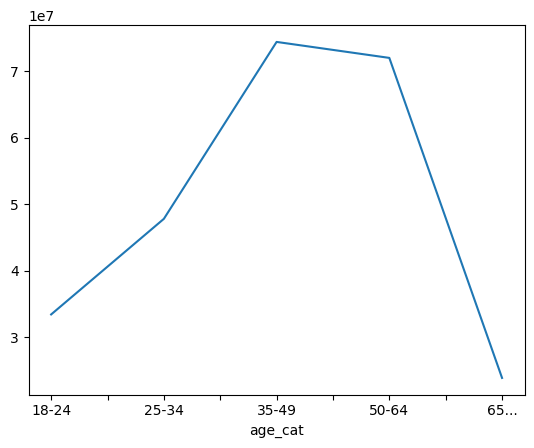

In [35]:
df3_age_total.plot()